In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import datetime
import holidays


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as CVS
from sklearn.ensemble import RandomForestRegressor as RFR

# Electricity demand prediction

Electricity demand prediction is one of important part of any modern energy managment system. We depend on it to make decisions in power system planning and operation. 

**Precise prediction** benefits for us to avoid high generation cost and the spinning reserve capacity. 

**Under-prediction** causes an insufficient reserve capacity preparation and can threaten the system stability.

**Over-prediction** causes an unnecessarily large reserve that leads to a high cost preparations.  

For thses reason,the accuracy and reliability of prediction is important. 

-------------------------------------------------------------------------
According to the future time window of forecasting task, there are 4 types prediction:

1) **Long-term**: 1 to 10 years  

2) **Medium-term**: 1 to 12 months  

3) **Short-term**: day ahead  

4) **very shout-term**: hours and minuts ahead  

-------------------------------------------------------------------------

The objective of this project is to predict short-term electricity demand. 


# 1. Data set - Target

##   Actual Load- NYISO

NYISO manage the flow of electricity throughout New York to ensure it’s produced in sufficient quantities, and transmitted where it needs to go — exactly when it’s needed.

This involves:

* Balancing the available supply of power, every six seconds, from hundreds of power plants over thousands of miles of transmission lines.  
* Matching offers from energy producers with consumer utility demand to supply power for the state as efficiently and cost-effectively as possible.  
* Overseeing the delivery of power from generators to the utility companies that serve millions of New York electricity consumers 24 hours a day, 7 days a week.  
* Evaluating system needs for the future.  

The NYISO works around the clock to sustain and enhance regional reliability, plan a more effective and efficient power system for the future, and provide objective information and data to policymakers, stakeholders, and investors pertaining to New York’s power system and electric infrastructure.

*Reference：https://www.nyiso.com/what-we-do#:~:text=The%20NYISO%20plans%20the%20power,bring%20renewable%20resources%20to%20customers.*

-------------------------------------------------------------------------

NYISO prodive the 12 zonal actual load data of New York state, including N.Y.C,NORTH,WEST,etc. This data is to upgrade per 5 minuts and also provide the intergrated real-time data which is to upgrade per hour.


In this programe, we used intergrated real-time data of **New York City** start from **2015-01-01 to 2020-11-30**. And our target is to predict day head forecast.

Download adress: https://www.nyiso.com/load-data

In [3]:
# import the load data
load2020 = pd.read_csv("load2020.csv",usecols=["Eastern Date Hour","TWI Actual Load"])
load2019 = pd.read_csv("load2019.csv",usecols=["Eastern Date Hour","TWI Actual Load"])
load2018 = pd.read_csv("load2018.csv",usecols=["Eastern Date Hour","TWI Actual Load"])
load2017 = pd.read_csv("load2017.csv",usecols=["Eastern Date Hour","TWI Actual Load"])
load2016 = pd.read_csv("load2016.csv",usecols=["Eastern Date Hour","TWI Actual Load"])
load2015 = pd.read_csv("load2015.csv",usecols=["Eastern Date Hour","TWI Actual Load"])

# seprate the date,YY/MM/DD hh:mm:dd, to diffrent frequency for check the trend of data
plt_load2017 = load2017.copy()
plt_load2017.columns =  ["date","load"]
plt_load2017["days"] = plt_load2017["date"].apply(lambda x: x.split(" ")[0])
plt_load2017["weeks"] = plt_load2017["date"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d").weekday())
plt_load2017["month"] = plt_load2017["date"].apply(lambda x: x.split(" ")[0][5:7])
plt_load2017["year"] = plt_load2017["date"].apply(lambda x: x.split(" ")[0][0:4])
plt_load2017["hours"] = plt_load2017["date"].apply(lambda x: x.split(" ")[1])

plt_load2018 = load2018.copy()
plt_load2018.columns =  ["date","load"]
plt_load2018["days"] = plt_load2018["date"].apply(lambda x: x.split(" ")[0])
plt_load2018["weeks"] = plt_load2018["date"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d").weekday())
plt_load2018["month"] = plt_load2018["date"].apply(lambda x: x.split(" ")[0][5:7])
plt_load2018["year"] = plt_load2018["date"].apply(lambda x: x.split(" ")[0][0:4])
plt_load2018["hours"] = plt_load2018["date"].apply(lambda x: x.split(" ")[1])

plt_load2019 = load2019.copy()
plt_load2019.columns =  ["date","load"]
plt_load2019["days"] = plt_load2019["date"].apply(lambda x: x.split(" ")[0])
plt_load2019["weeks"] = plt_load2019["date"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d").weekday())
plt_load2019["month"] = plt_load2019["date"].apply(lambda x: x.split(" ")[0][5:7])
plt_load2019["year"] = plt_load2019["date"].apply(lambda x: x.split(" ")[0][0:4])
plt_load2019["hours"] = plt_load2019["date"].apply(lambda x: x.split(" ")[1])

plt_load2020 = load2020.copy()
plt_load2020.columns =  ["date","load"]
plt_load2020["days"] = plt_load2020["date"].apply(lambda x: x.split(" ")[0])
plt_load2020["weeks"] = plt_load2020["date"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d").weekday())
plt_load2020["month"] = plt_load2020["date"].apply(lambda x: x.split(" ")[0][5:7])
plt_load2020["year"] = plt_load2020["date"].apply(lambda x: x.split(" ")[0][0:4])
plt_load2020["hours"] = plt_load2020["date"].apply(lambda x: x.split(" ")[1])

In [4]:
plt_load2020

,date,load,days,weeks,month,year,hours
0,2020/01/01 00:00:00,4897.1000,2020/01/01,2,01,2020,00:00:00
1,2020/01/01 01:00:00,4763.3000,2020/01/01,2,01,2020,01:00:00
2,2020/01/01 02:00:00,4622.3000,2020/01/01,2,01,2020,02:00:00
3,2020/01/01 03:00:00,4510.8000,2020/01/01,2,01,2020,03:00:00
4,2020/01/01 04:00:00,4456.4000,2020/01/01,2,01,2020,04:00:00
...,...,...,...,...,...,...,...
8035,2020/11/30 19:00:00,5544.5575,2020/11/30,0,11,2020,19:00:00
8036,2020/11/30 20:00:00,5324.0932,2020/11/30,0,11,2020,20:00:00
8037,2020/11/30 21:00:00,5095.0356,2020/11/30,0,11,2020,21:00:00
8038,2020/11/30 22:00:00,4795.3832,2020/11/30,0,11,2020,22:00:00


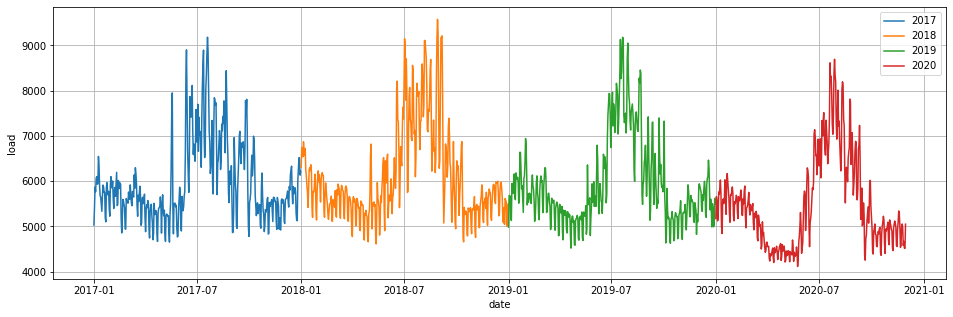

In [5]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(plt_load2017.groupby("days").agg("mean").index),plt_load2017.groupby("days").agg("mean")["load"],label="2017")
ax.plot(pd.to_datetime(plt_load2018.groupby("days").agg("mean").index),plt_load2018.groupby("days").agg("mean")["load"],label="2018")
ax.plot(pd.to_datetime(plt_load2019.groupby("days").agg("mean").index),plt_load2019.groupby("days").agg("mean")["load"],label="2019")
ax.plot(pd.to_datetime(plt_load2020.groupby("days").agg("mean").index),plt_load2020.groupby("days").agg("mean")["load"],label="2020")
ax.legend()  
plt.ylabel('load')
plt.xlabel('date')

plt.grid(True)
plt.show()

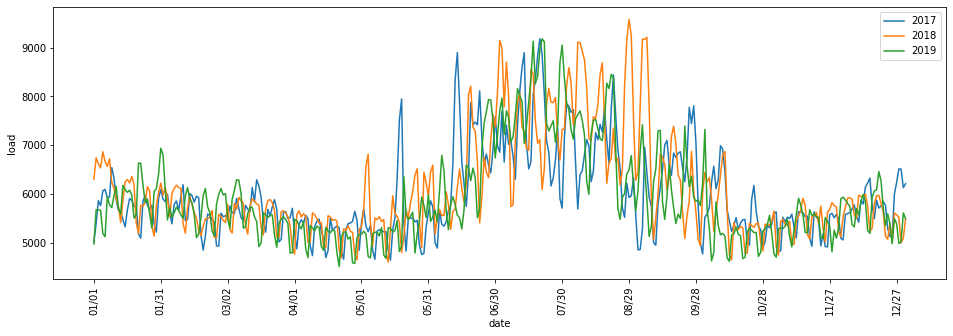

In [6]:
###### fig = plt.figure(figsize=(16,5))
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

plt_load2017["mm/dd"] = plt_load2017["date"].apply(lambda x: x[5:10])
plt_load2018["mm/dd"] = plt_load2018["date"].apply(lambda x: x[5:10])
plt_load2019["mm/dd"] = plt_load2019["date"].apply(lambda x: x[5:10])
plt_load2020["mm/dd"] = plt_load2020["date"].apply(lambda x: x[5:10])

ax.plot(plt_load2017.groupby("mm/dd").agg("mean").index,plt_load2017.groupby("mm/dd").agg("mean")["load"],label="2017")
ax.plot(plt_load2018.groupby("mm/dd").agg("mean").index,plt_load2018.groupby("mm/dd").agg("mean")["load"],label="2018")
ax.plot(plt_load2019.groupby("mm/dd").agg("mean").index,plt_load2019.groupby("mm/dd").agg("mean")["load"],label="2019")


ax.legend()  
plt.ylabel('load')
plt.xlabel('date')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

plt.show()

**Discover from distribution**: From the graph, we can see the change of time influence the demand of load. And there is rule in the change, because the load demand has every similar distribution for each year. 

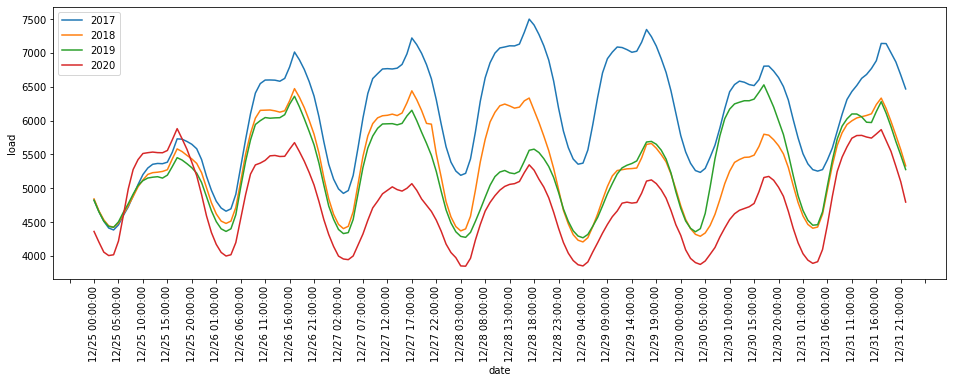

In [7]:
###### fig = plt.figure(figsize=(16,5))
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

plt_load2017["mm/dd xx:00:00"] = plt_load2017["date"].apply(lambda x: x[5:])
plt_load2018["mm/dd xx:00:00"] = plt_load2018["date"].apply(lambda x: x[5:])
plt_load2019["mm/dd xx:00:00"] = plt_load2019["date"].apply(lambda x: x[5:])
plt_load2020["mm/dd xx:00:00"] = plt_load2020["date"].apply(lambda x: x[5:])

ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2017["load"][-168:-1],label="2017")
ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2018["load"][-168:-1],label="2018")
ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2019["load"][-168:-1],label="2019")
ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2020["load"][-168:-1],label="2020")

ax.legend()  
plt.ylabel('load')
plt.xlabel('date')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

**Discover from distribution**: This is a cycle for each days

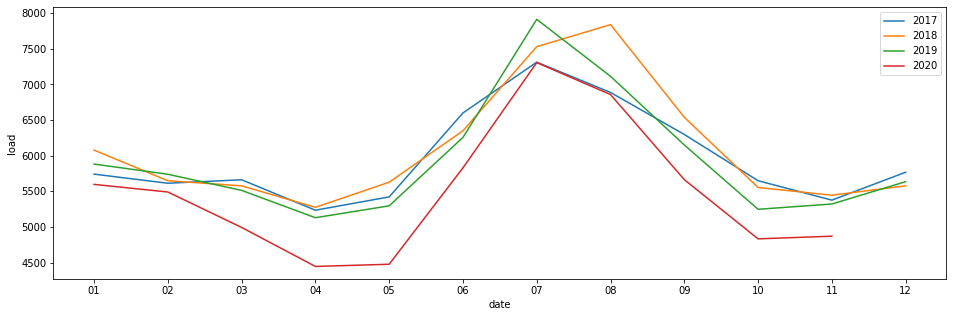

In [8]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(plt_load2017.groupby("month").agg("mean").index,plt_load2017.groupby("month").agg("mean")["load"],label="2017")
ax.plot(plt_load2018.groupby("month").agg("mean").index,plt_load2018.groupby("month").agg("mean")["load"],label="2018")
ax.plot(plt_load2019.groupby("month").agg("mean").index,plt_load2019.groupby("month").agg("mean")["load"],label="2019")
ax.plot(plt_load2020.groupby("month").agg("mean").index,plt_load2020.groupby("month").agg("mean")["load"],label="2020")
ax.legend()  
plt.ylabel('load')
plt.xlabel('date')

plt.show()

**Discover from distribution**: The month of year has large influce the load. Before the May, the load has a decrese trend. But after that Loan has dramtically increase and arrive the peak at July. After that the load decrease again.

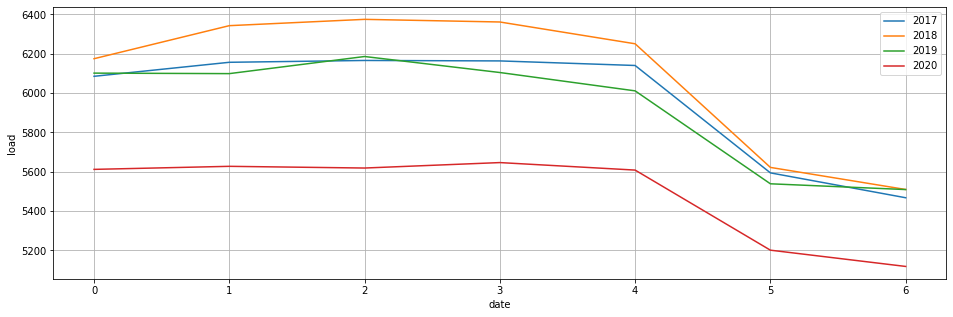

In [9]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(plt_load2017.groupby("weeks").agg("mean").index,plt_load2017.groupby("weeks").agg("mean")["load"],label="2017")
ax.plot(plt_load2018.groupby("weeks").agg("mean").index,plt_load2018.groupby("weeks").agg("mean")["load"],label="2018")
ax.plot(plt_load2019.groupby("weeks").agg("mean").index,plt_load2019.groupby("weeks").agg("mean")["load"],label="2019")
ax.plot(plt_load2020.groupby("weeks").agg("mean").index,plt_load2020.groupby("weeks").agg("mean")["load"],label="2020")
ax.legend()  
plt.ylabel('load')
plt.xlabel('date')


plt.grid(True)
plt.show()

**Discover from distribution**: At the workday, the citizen spend almost same level of load. On the other hand, the electricity consumption decrease at weekendays.

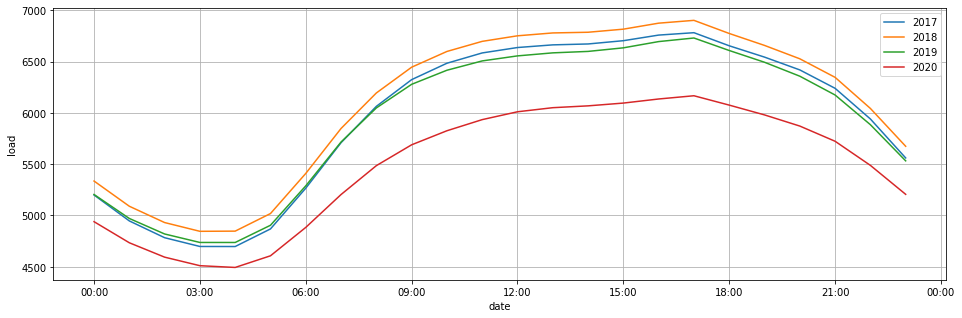

In [10]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(plt_load2017.groupby("hours").agg("mean").index),plt_load2017.groupby("hours").agg("mean")["load"],label="2017")
ax.plot(pd.to_datetime(plt_load2018.groupby("hours").agg("mean").index),plt_load2018.groupby("hours").agg("mean")["load"],label="2018")
ax.plot(pd.to_datetime(plt_load2019.groupby("hours").agg("mean").index),plt_load2019.groupby("hours").agg("mean")["load"],label="2019")
ax.plot(pd.to_datetime(plt_load2020.groupby("hours").agg("mean").index),plt_load2020.groupby("hours").agg("mean")["load"],label="2020")
ax.legend()  
plt.ylabel('load')
plt.xlabel('date')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid(True)
plt.show()

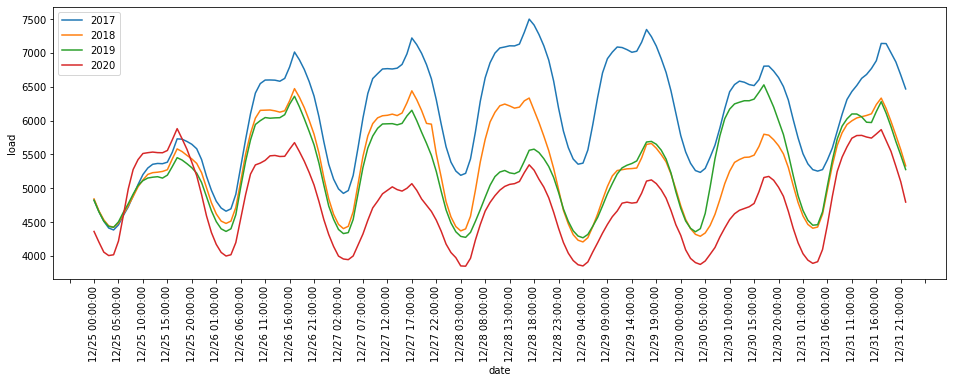

In [11]:
###### fig = plt.figure(figsize=(16,5))
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

plt_load2017["mm/dd xx:00:00"] = plt_load2017["date"].apply(lambda x: x[5:])
plt_load2018["mm/dd xx:00:00"] = plt_load2018["date"].apply(lambda x: x[5:])
plt_load2019["mm/dd xx:00:00"] = plt_load2019["date"].apply(lambda x: x[5:])
plt_load2020["mm/dd xx:00:00"] = plt_load2020["date"].apply(lambda x: x[5:])

ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2017["load"][-168:-1],label="2017")
ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2018["load"][-168:-1],label="2018")
ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2019["load"][-168:-1],label="2019")
ax.plot(plt_load2017["mm/dd xx:00:00"][-168:-1],plt_load2020["load"][-168:-1],label="2020")

ax.legend()  
plt.ylabel('load')
plt.xlabel('date')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

**Discover from distribution**: This is a cycle for each days

**Discover from distribution**: Star from the 6:00, the load has increase trend, and almost arrive the peck at 12:00, then decreace at 18:00. It is mean, the worktime is influence the load.

# 2. Features 

## 2.1 Time feature
### 2.1.1 Historical Demand
Based on the above analysis, we discovered that the electricity has a cycle. So the historicla consumption can help us to predict future load. Based on that we created the 3 histrionical demand data.

**t_y1**:  load value from 1 year earlier 

**t_h24**: load value from 24 hours earlier

**t_h48**: load value from 24 hours earlier

In [12]:
# load demand from 2016- 2020
load = pd.concat([load2016,load2017,load2018,load2019,load2020])
load.columns =  ["date","load"]

# t_y1 load value from 1 year earlier 
t_y1 = pd.concat([load2015,load2016,load2017,load2018,load2019])
t_y1["Eastern Date Hour"] = t_y1["Eastern Date Hour"].apply(lambda x:"20"+str(int(x.split("20")[1][:2])+1) + x[4:])
t_y1.columns =  ["date","t_y1"]
load = load.merge(t_y1,on="date")

# t_h24 load value from 24 hours earlier 
t_h24  = pd.concat([load2015,load2016,load2017,load2018,load2019,load2020])
t_h24["Eastern Date Hour"] = t_h24["Eastern Date Hour"].apply(lambda x: (str(datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d")+datetime.timedelta(days=1)).split(" ")[0]+" "+ x.split(" ")[1]).replace("-","/"))
t_h24.columns =  ["date","t_h24"]
load = load.merge(t_h24,on="date")

# t_h48 load value from 24 hours earlier 
t_h48  = pd.concat([load2015,load2016,load2017,load2018,load2019,load2020])
t_h48["Eastern Date Hour"] = t_h48["Eastern Date Hour"].apply(lambda x: (str(datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d")+datetime.timedelta(days=2)).split(" ")[0]+" "+ x.split(" ")[1]).replace("-","/"))
t_h48.columns =  ["date","t_h48"]
load = load.merge(t_h48,on="date")

### 2.1.2 Calendar data

Since the change of time afftects load value. We also create some feature related to the calendar.

**wkd**: Indicator of weekends. 1 is weekendays, 0 is workdays

**day**: Day of month(1-31)

**woy**: Weak of the year(1-53)

**quarter**： quarter of the year (1-4)

**month**: Month of year (1-12)

**hour**: hour of the day(0-23)

**holiday**: Indicator of holidat.1 is holiday 0 is not holiday

In [13]:
def quarter(month):
    S = []
    for i in range(len(month)):
        if month[i] =="01" or  month[i] =="02" or  month[i] =="03":
            Q = 1
            S.append(Q)
        if month[i] =="04" or  month[i] =="05" or  month[i] =="06":
            Q = 2
            S.append(Q)
        if month[i] =="07" or  month[i] =="08" or  month[i] =="09":
            Q = 3
            S.append(Q)
        if month[i] =="10" or  month[i] =="11" or  month[i] =="12":
            Q = 4
            S.append(Q)
    return S

In [14]:
# time
# wkd: 1 is weekendays, 0 is workdays
load["wkd"] = load["date"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d").weekday())
load["wkd"] = np.where((load["wkd"]==5)|(load["wkd"]==6),1,0)

# day: Day of month(1-31)
load["day"] = load["date"].apply(lambda x: x.split(" ")[0][-2:])

#woy: Weak of the year(1-53) 
load["woy"] = load["date"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d").isocalendar()[1])

# month: Month of year (1-12)
load["month"] = load["date"].apply(lambda x: x.split(" ")[0][5:7])

# quarter: quarter of year（1-4）

load["quarter"] = quarter(load["month"])

# hour: hour of the day(0-23)
load["hour"] = load["date"].apply(lambda x: x.split(" ")[1][:2])

# holiday: 1 is holiday 0 is not holiday
us_holidays = holidays.US()
load["holiday"] = load["date"].apply(lambda x: int(datetime.datetime.strptime(x.split(" ")[0], "%Y/%m/%d") in us_holidays))


In [15]:
load

,date,load,t_y1,t_h24,t_h48,wkd,day,woy,month,quarter,hour,holiday
0,2016/01/01 00:00:00,4894.5000,5272.0,4798.3000,4762.3000,0,01,53,01,1,00,1
1,2016/01/01 01:00:00,4712.7000,5092.6,4534.7000,4521.5000,0,01,53,01,1,01,1
2,2016/01/01 02:00:00,4510.4000,4909.5,4350.8000,4366.7000,0,01,53,01,1,02,1
3,2016/01/01 03:00:00,4368.4000,4771.4,4266.8000,4300.3000,0,01,53,01,1,03,1
4,2016/01/01 04:00:00,4286.8000,4698.5,4264.1000,4325.6000,0,01,53,01,1,04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43059,2020/11/30 19:00:00,5544.5575,5606.1,5117.8715,5068.1746,0,30,49,11,4,19,0
43060,2020/11/30 20:00:00,5324.0932,5506.9,5014.7741,4976.7173,0,30,49,11,4,20,0
43061,2020/11/30 21:00:00,5095.0356,5398.0,4880.7432,4853.0441,0,30,49,11,4,21,0
43062,2020/11/30 22:00:00,4795.3832,5241.0,4659.5457,4671.0050,0,30,49,11,4,22,0


## 2.2 COVID-19

In addidtion, we also find a interesting fact that load value of 2020 is less than previos years. Based on the below table, the mean of preivios years is about 6000, but mean of 2000 only 5490.

And the bigestt event of 2020 is COVID-19. For this reason, we use number of case in New York City as a features. We get the data from the "NYC Health". It upgrade the data every days. So we lag one days data. For example, we use t-(1 day) to predict load value at t.

Download address: https://www1.nyc.gov/site/doh/covid/covid-19-data.page 

Based on that, I introduce 2 features:

**covid19_count**: Number of new case of COVID-19 per day  

**c19_ind**: Indicator of the case of COVID-19. 1: has case; 0 : no case


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2017,8760.0,5966.450890,1190.700510,3892.2,5118.9250,5933.60000,6557.75000,10670.700
2018,8760.0,6091.286084,1300.016572,3774.5,5168.5750,5963.75000,6690.12500,11069.700
2019,8760.0,5936.380799,1221.412985,3826.4,5055.4750,5844.50000,6505.87500,10802.300
2020,8040.0,5490.315197,1198.898915,3604.2,4617.5623,5299.39365,6161.23325,10149.665


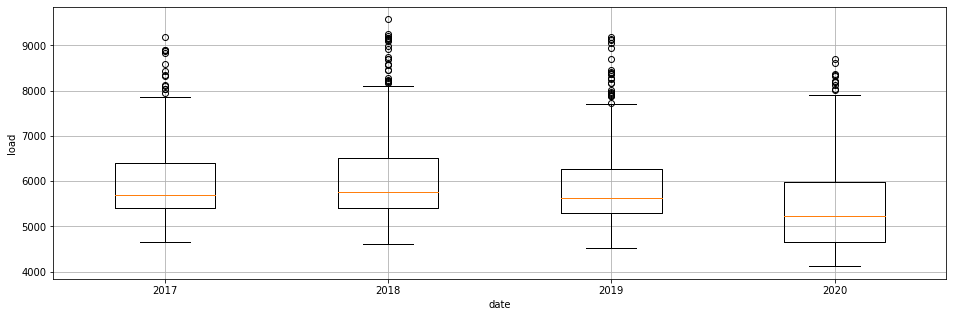

In [16]:
display(pd.concat([plt_load2017.groupby("year")["load"].describe(),
           plt_load2018.groupby("year")["load"].describe(),
           plt_load2019.groupby("year")["load"].describe(),
           plt_load2020.groupby("year")["load"].describe()]))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.boxplot([plt_load2017.groupby("days").agg("mean")["load"],
            plt_load2018.groupby("days").agg("mean")["load"],
            plt_load2019.groupby("days").agg("mean")["load"],
            plt_load2020.groupby("days").agg("mean")["load"]], labels =['2017','2018','2019','2020'])

plt.ylabel('load')
plt.xlabel('date')

plt.grid(True)
plt.show()

,covid19_count,date_days
1,0,2020/03/01
2,0,2020/03/02
3,1,2020/03/03
4,5,2020/03/04
5,3,2020/03/05
...,...,...
271,730,2020/11/26
272,2145,2020/11/27
273,1687,2020/11/28
274,1596,2020/11/29


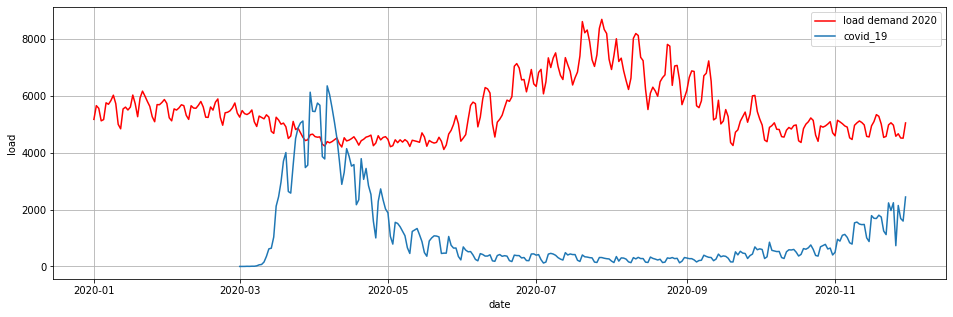

In [17]:
covid_19 = pd.read_csv("COVID-19.csv", usecols=["date_of_interest","CASE_COUNT"]) 
covid_19.columns = ["date","covid19_count"]
covid_19 = covid_19[covid_19["date"].apply(lambda x: x.split("/")[0]).astype(int) > 2]
covid_19 = covid_19[covid_19["date"].apply(lambda x: x.split("/")[0]).astype(int) < 12]
covid_19["date_days"] = covid_19["date"].apply(lambda x: x.split("/")[2]+"/"+ x.split("/")[0]+"/"+ x.split("/")[1])
covid_19.drop(columns=["date"],inplace=True)
display(covid_19)

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(plt_load2020.groupby("days").agg("mean").index),plt_load2020.groupby("days").agg("mean")["load"],color="r",label="load demand 2020")
ax.plot(pd.to_datetime(covid_19["date_days"]),covid_19["covid19_count"],label="covid_19")
ax.legend()  
plt.ylabel('load')
plt.xlabel('date')

plt.grid(True)
plt.show()

In [18]:
# shift 1
covid_19["covid19_count"] = covid_19["covid19_count"].shift(1)

# merge
load["date_days"] = load["date"].apply(lambda x: x.split(" ")[0])


data = load.merge(covid_19,on="date_days",how="left")
data.drop(columns=["date_days"],inplace = True)
data["covid19_count"] = data["covid19_count"].shift(1)
# Using 0 to fill nan of covid19_count
data.fillna(0,inplace=True)

# 1: have case, 0: do not have case
data["c19_ind"] = (data["covid19_count"] !=0).astype(int)

data

,date,load,t_y1,t_h24,t_h48,wkd,day,woy,month,quarter,hour,holiday,covid19_count,c19_ind
0,2016/01/01 00:00:00,4894.5000,5272.0,4798.3000,4762.3000,0,01,53,01,1,00,1,0.0,0
1,2016/01/01 01:00:00,4712.7000,5092.6,4534.7000,4521.5000,0,01,53,01,1,01,1,0.0,0
2,2016/01/01 02:00:00,4510.4000,4909.5,4350.8000,4366.7000,0,01,53,01,1,02,1,0.0,0
3,2016/01/01 03:00:00,4368.4000,4771.4,4266.8000,4300.3000,0,01,53,01,1,03,1,0.0,0
4,2016/01/01 04:00:00,4286.8000,4698.5,4264.1000,4325.6000,0,01,53,01,1,04,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43059,2020/11/30 19:00:00,5544.5575,5606.1,5117.8715,5068.1746,0,30,49,11,4,19,0,1596.0,1
43060,2020/11/30 20:00:00,5324.0932,5506.9,5014.7741,4976.7173,0,30,49,11,4,20,0,1596.0,1
43061,2020/11/30 21:00:00,5095.0356,5398.0,4880.7432,4853.0441,0,30,49,11,4,21,0,1596.0,1
43062,2020/11/30 22:00:00,4795.3832,5241.0,4659.5457,4671.0050,0,30,49,11,4,22,0,1596.0,1


## 2.3 Economy and Market Feartue
### 2.3.1 NYFSN

Baed on the U.S energy information administration, the economy of country has an impact on its energy use,particularly electricity. There is postive relationship between economic output(measured by GDP) and short-term changes in electricity use.

Reference: https://www.eia.gov/todayinenergy/detail.php?id=10491

But upgrade GDP's data is low frequency. For this reason, New York Fed Staff Nowcas as a factor to present GDP growth.

New York Fed Staff Nowcast uses historical relationships to estimate the implication of macroecnomic data for current and next quarter GDP growth. The its benifit is to keep higher frequnecy upgrate. It almost upgrade per week.

Download address: https://www.newyorkfed.org/research/policy/nowcast.

When it uprage, we use forward fill to fill the missing value. For example, it upgraded at 2020/11/20, and we will use this data for one week untill next upgrade.

In [19]:
nyfsn = pd.read_excel("New-York-Fed-Staff-Nowcast_data_2002-present.xlsx",sheet_name="Forecasts By Horizon",skiprows=range(0,13,1),usecols=["Forecast date","Nowcast\n(current quarter)"])
nyfsn.columns=["date","NYFSN"]
nyfsn = nyfsn[nyfsn["date"] > "2015"]
nyfsn["date"] = nyfsn["date"].apply(lambda x: str(x).replace("-","/"))

data = data.merge(nyfsn, on = "date", how = "left")

data.fillna(method="ffill",inplace = True)

,date,NYFSN
678,2015/01/02 00:00:00,2.46
679,2015/01/09 00:00:00,2.36
680,2015/01/16 00:00:00,1.62
681,2015/01/23 00:00:00,1.66
682,2015/01/30 00:00:00,1.73
...,...,...
983,2020/11/06 00:00:00,2.86
984,2020/11/13 00:00:00,2.86
985,2020/11/20 00:00:00,2.86
986,2020/11/27 00:00:00,2.82


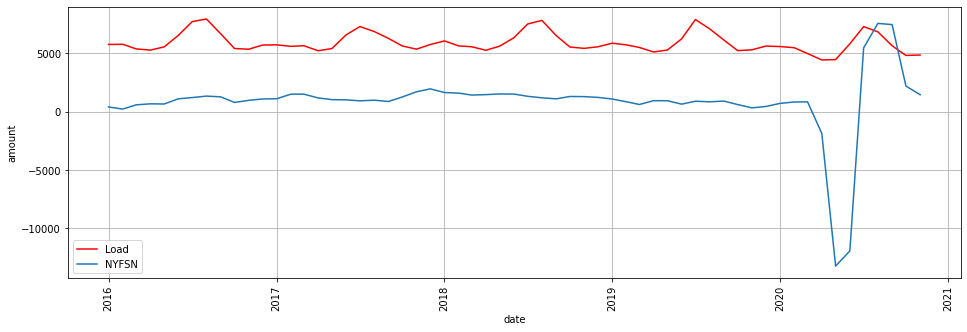

In [20]:
display(nyfsn)
data["y/m"]= data["date"].apply(lambda x: x[:7])
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(data.groupby("y/m").agg("mean").index),data.groupby("y/m").agg("mean")["load"],color="r",label="Load")
ax.plot(pd.to_datetime(data.groupby("y/m").agg("mean").index),data.groupby("y/m").agg("mean")["NYFSN"]*500,label="NYFSN")

ax.legend()  
plt.ylabel('amount')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### 2.3.2 Employment

The employment is also a factor that can be affected by COVID-19. With the decrease of employment, I assume the load value will decrease.

The data of employment is provided by the gorvernment of New York State. 
 
Download address： https://www.labor.ny.gov/stats/nyc/index.shtm
 
It is monthly upgraded. For ecample, we will get the employment of October at November. For this reason，we use t-1 month data to predict t month load value

In [21]:
# employment
emp = pd.read_excel("NYChist-employment.xls",skiprows=[0],
                                        usecols=["YEAR","INDUSTRY_TITLE","JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"])
emp = emp[emp["YEAR"] >2014]     
emp = emp.groupby("YEAR").agg("sum")
emp.columns = ["01","02","03","04","05","06","07","08","09","10","11","12"]

emp = pd.DataFrame(emp.unstack())
emp = emp.reset_index().sort_values(["YEAR","level_0"])
emp.reset_index(drop=True,inplace=True)
emp.columns = ["months","year","emp"]
emp["emp"] = emp["emp"].shift(1)
emp.dropna(inplace=True)
emp["y/m"] = emp["year"].astype(int).astype(str)+ "/" + emp["months"]
emp.drop(columns=["months","year"],inplace=True)


,emp,y/m
1,28853.4,2015/02
2,29103.2,2015/03
3,29249.9,2015/04
4,29445.2,2015/05
5,29597.9,2015/06
...,...,...
67,26949.9,2020/08
68,27454.8,2020/09
69,27958.8,2020/10
70,28421.3,2020/11


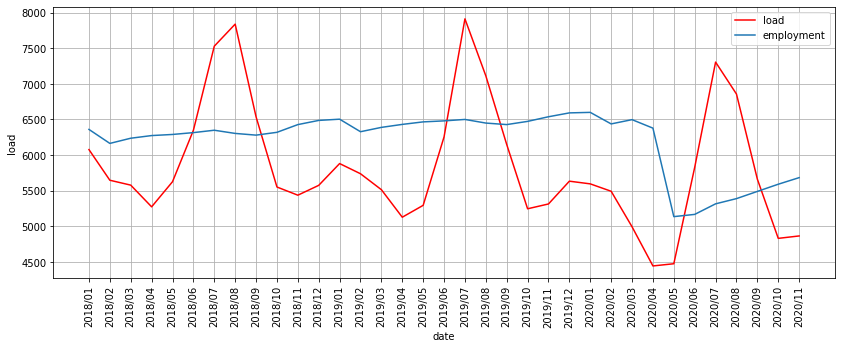

In [22]:
display(emp)


emp_x = emp.iloc[35:-1]["y/m"].values
emp_y = emp.iloc[35:-1]["emp"].values
load_x = data.groupby("y/m").agg("mean")["load"].index[24:]
load_y = data.groupby("y/m").agg("mean")["load"].values[24:]

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(111)

ax.plot(load_x ,load_y,color="r",label="load")
ax.plot(emp_x,emp_y/5,label="employment")

ax.legend()  
plt.ylabel('load')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [23]:
# merge
data = data.merge(emp, on ="y/m")
data

,date,load,t_y1,t_h24,t_h48,wkd,day,woy,month,quarter,hour,holiday,covid19_count,c19_ind,NYFSN,y/m,emp
0,2016/01/01 00:00:00,4894.5000,5272.0,4798.3000,4762.3000,0,01,53,01,1,00,1,0.0,0,0.99,2016/01,30525.6
1,2016/01/01 01:00:00,4712.7000,5092.6,4534.7000,4521.5000,0,01,53,01,1,01,1,0.0,0,0.99,2016/01,30525.6
2,2016/01/01 02:00:00,4510.4000,4909.5,4350.8000,4366.7000,0,01,53,01,1,02,1,0.0,0,0.99,2016/01,30525.6
3,2016/01/01 03:00:00,4368.4000,4771.4,4266.8000,4300.3000,0,01,53,01,1,03,1,0.0,0,0.99,2016/01,30525.6
4,2016/01/01 04:00:00,4286.8000,4698.5,4264.1000,4325.6000,0,01,53,01,1,04,1,0.0,0,0.99,2016/01,30525.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43059,2020/11/30 19:00:00,5544.5575,5606.1,5117.8715,5068.1746,0,30,49,11,4,19,0,1596.0,1,2.82,2020/11,28421.3
43060,2020/11/30 20:00:00,5324.0932,5506.9,5014.7741,4976.7173,0,30,49,11,4,20,0,1596.0,1,2.82,2020/11,28421.3
43061,2020/11/30 21:00:00,5095.0356,5398.0,4880.7432,4853.0441,0,30,49,11,4,21,0,1596.0,1,2.82,2020/11,28421.3
43062,2020/11/30 22:00:00,4795.3832,5241.0,4659.5457,4671.0050,0,30,49,11,4,22,0,1596.0,1,2.82,2020/11,28421.3


### 2.3.3  price

The price always reflect the supply and demand of product. For this reason, we also use the day ahead price to predict the load value. The data also come from the New York Independent System Operator.

Download address: https://www.nyiso.com/energy-market-operational-data

This price is locational marginal price for electric energy at each load zone.

reference: https://www.iso-ne.com/participate/support/faq/lmp

In [24]:
# price
ahead_price = pd.read_csv("price2016-2020.csv",usecols=["Eastern Date Hour","DAM Zonal LBMP"])
ahead_price.columns=["date","LBMP"]

#merge
data = data.merge(ahead_price,on="date")

,date,LBMP
0,2016/01/01 00:00:00,25.84
1,2016/01/01 01:00:00,22.10
2,2016/01/01 02:00:00,18.65
3,2016/01/01 03:00:00,18.68
4,2016/01/01 04:00:00,19.40
...,...,...
43099,2020/11/30 19:00:00,24.94
43100,2020/11/30 20:00:00,22.51
43101,2020/11/30 21:00:00,20.29
43102,2020/11/30 22:00:00,17.63


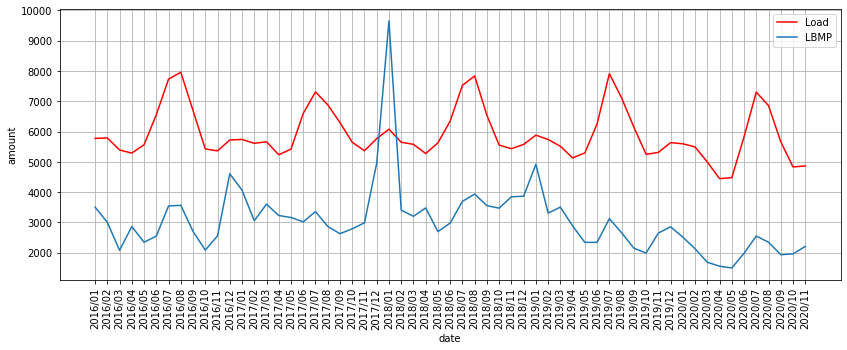

In [25]:
display(ahead_price)

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(111)

ax.plot(data.groupby("y/m").agg("mean").index,data.groupby("y/m").agg("mean")["load"],color="r",label="Load")
ax.plot(data.groupby("y/m").agg("mean").index,data.groupby("y/m").agg("mean")["LBMP"]*100,label="LBMP")

ax.legend()  
plt.ylabel('amount')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [26]:
data

,date,load,t_y1,t_h24,t_h48,wkd,day,woy,month,quarter,hour,holiday,covid19_count,c19_ind,NYFSN,y/m,emp,LBMP
0,2016/01/01 00:00:00,4894.5000,5272.0,4798.3000,4762.3000,0,01,53,01,1,00,1,0.0,0,0.99,2016/01,30525.6,25.84
1,2016/01/01 01:00:00,4712.7000,5092.6,4534.7000,4521.5000,0,01,53,01,1,01,1,0.0,0,0.99,2016/01,30525.6,22.10
2,2016/01/01 02:00:00,4510.4000,4909.5,4350.8000,4366.7000,0,01,53,01,1,02,1,0.0,0,0.99,2016/01,30525.6,18.65
3,2016/01/01 03:00:00,4368.4000,4771.4,4266.8000,4300.3000,0,01,53,01,1,03,1,0.0,0,0.99,2016/01,30525.6,18.68
4,2016/01/01 04:00:00,4286.8000,4698.5,4264.1000,4325.6000,0,01,53,01,1,04,1,0.0,0,0.99,2016/01,30525.6,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43069,2020/11/30 19:00:00,5544.5575,5606.1,5117.8715,5068.1746,0,30,49,11,4,19,0,1596.0,1,2.82,2020/11,28421.3,24.94
43070,2020/11/30 20:00:00,5324.0932,5506.9,5014.7741,4976.7173,0,30,49,11,4,20,0,1596.0,1,2.82,2020/11,28421.3,22.51
43071,2020/11/30 21:00:00,5095.0356,5398.0,4880.7432,4853.0441,0,30,49,11,4,21,0,1596.0,1,2.82,2020/11,28421.3,20.29
43072,2020/11/30 22:00:00,4795.3832,5241.0,4659.5457,4671.0050,0,30,49,11,4,22,0,1596.0,1,2.82,2020/11,28421.3,17.63


In [27]:
data.drop(columns ="y/m",inplace=True)

## 2.4  weather features

Based on the paper of Istiaque, A., &Khan, S.I. (2018), they concluded that there is a strong relationship between changes in the temperature and electricity consumption. They used the  weather data,such as temperature, humidity, wind speed,wind direction, atmospheric pressure, dew point and visibility etc. to electricity demand of the city.

Reference: https://pdfs.semanticscholar.org/62ca/23d62f470d38110989b77528fae13bae21df.pdf

For this reason, we also introduce the weather features. The weather data from the Wundergroud

Data address: https://www.wunderground.com/history/daily/KLGA/date/2020-01-01

This webside didnt provide the download. So I use the web crawler to access the data. The detail please refer the "weather.ipynb"

In [28]:
weather = pd.read_csv("weather_features.csv",usecols=["date","Temperature","Dew Point","Humidity","Wind Speed","Condition"])
weather

,Temperature,Dew Point,Humidity,Wind Speed,Condition,date
0,43.0,29.0,58.0,12.0,Cloudy,2016/01/01 00:00:00
1,43.0,29.0,58.0,17.0,Cloudy,2016/01/01 01:00:00
2,43.0,28.0,56.0,16.0,Cloudy,2016/01/01 02:00:00
3,42.0,27.0,55.0,13.0,Cloudy,2016/01/01 03:00:00
4,42.0,27.0,55.0,13.0,Cloudy,2016/01/01 04:00:00
...,...,...,...,...,...,...
43035,65.0,60.0,84.0,21.0,Cloudy,2020/11/30 19:00:00
43036,65.0,59.0,81.0,29.0,Fog,2020/11/30 20:00:00
43037,63.0,57.0,81.0,8.0,Rain,2020/11/30 21:00:00
43038,62.0,56.0,80.0,12.0,Cloudy,2020/11/30 22:00:00


In [29]:
data = data.merge(weather,on="date")
data

,date,load,t_y1,t_h24,t_h48,wkd,day,woy,month,quarter,...,covid19_count,c19_ind,NYFSN,emp,LBMP,Temperature,Dew Point,Humidity,Wind Speed,Condition
0,2016/01/01 00:00:00,4894.5000,5272.0,4798.3000,4762.3000,0,01,53,01,1,...,0.0,0,0.99,30525.6,25.84,43.0,29.0,58.0,12.0,Cloudy
1,2016/01/01 01:00:00,4712.7000,5092.6,4534.7000,4521.5000,0,01,53,01,1,...,0.0,0,0.99,30525.6,22.10,43.0,29.0,58.0,17.0,Cloudy
2,2016/01/01 02:00:00,4510.4000,4909.5,4350.8000,4366.7000,0,01,53,01,1,...,0.0,0,0.99,30525.6,18.65,43.0,28.0,56.0,16.0,Cloudy
3,2016/01/01 03:00:00,4368.4000,4771.4,4266.8000,4300.3000,0,01,53,01,1,...,0.0,0,0.99,30525.6,18.68,42.0,27.0,55.0,13.0,Cloudy
4,2016/01/01 04:00:00,4286.8000,4698.5,4264.1000,4325.6000,0,01,53,01,1,...,0.0,0,0.99,30525.6,19.40,42.0,27.0,55.0,13.0,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42990,2020/11/30 19:00:00,5544.5575,5606.1,5117.8715,5068.1746,0,30,49,11,4,...,1596.0,1,2.82,28421.3,24.94,65.0,60.0,84.0,21.0,Cloudy
42991,2020/11/30 20:00:00,5324.0932,5506.9,5014.7741,4976.7173,0,30,49,11,4,...,1596.0,1,2.82,28421.3,22.51,65.0,59.0,81.0,29.0,Fog
42992,2020/11/30 21:00:00,5095.0356,5398.0,4880.7432,4853.0441,0,30,49,11,4,...,1596.0,1,2.82,28421.3,20.29,63.0,57.0,81.0,8.0,Rain
42993,2020/11/30 22:00:00,4795.3832,5241.0,4659.5457,4671.0050,0,30,49,11,4,...,1596.0,1,2.82,28421.3,17.63,62.0,56.0,80.0,12.0,Cloudy


## 3. Transformation and Encoding

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
load,42995.0,5926.675352,1273.154569,3604.20,4973.50000,5825.2000,6544.80,11069.70
t_y1,42995.0,6047.917609,1276.509331,3774.50,5134.70000,5956.5000,6663.40,11069.70
t_h24,42995.0,5927.042700,1272.682879,3604.20,4974.75000,5826.0654,6544.75,11069.70
t_h48,42995.0,5927.400799,1272.614437,3604.20,4974.63145,5826.5000,6544.80,11069.70
wkd,42995.0,0.285452,0.451635,0.00,0.00000,0.0000,1.00,1.00
woy,42995.0,26.200581,14.852546,1.00,13.00000,26.0000,39.00,53.00
quarter,42995.0,2.483614,1.108892,1.00,1.00000,2.0000,3.00,4.00
holiday,42995.0,0.030143,0.170983,0.00,0.00000,0.0000,0.00,1.00
covid19_count,42995.0,165.892034,662.832309,0.00,0.00000,0.0000,0.00,6353.00
c19_ind,42995.0,0.150785,0.357843,0.00,0.00000,0.0000,0.00,1.00


In [31]:
#Normalization
data["t_y1"] = (data["t_y1"]- data["t_y1"].min())/(data["t_y1"].max()-data["t_y1"].min())
data["t_h24"] = (data["t_h24"]- data["t_h24"].min())/(data["t_h24"].max()-data["t_h24"].min())
data["t_h48"] = (data["t_h48"]- data["t_h48"].min())/(data["t_h48"].max()-data["t_h48"].min())
data["emp"] = (data["emp"]- data["emp"].min())/(data["emp"].max()-data["emp"].min())
data["covid19_count"] = (data["covid19_count"]- data["covid19_count"].min())/(data["covid19_count"].max()-data["covid19_count"].min())

In [43]:
#Encoding
data = pd.get_dummies(data, columns = ["day","woy","month","hour","quarter","Condition"])

## 4.  Modeling

In [44]:
# For final test
data2 = data[pd.to_datetime(data["date"])>="2020-11-10"]

In [45]:
# For train and cross_validation
y = data[pd.to_datetime(data["date"])<"2020-11-01"]["load"]
X = data[pd.to_datetime(data["date"])<"2020-11-01"].drop(columns=["load","date"])

## XGBoost

First we use defalut paramters of XGBoost to see the performance of model

In [46]:
import xgboost as xgb
dtrain= xgb.DMatrix(X,y)

# default param
param = {}
num_round = 400
n_fold=5

cvresult = xgb.cv(param, dtrain, num_round,n_fold)
cvresult

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4266.416406,2.231313,4266.919531,9.873996
1,2999.709961,1.699679,3000.491308,8.205494
2,2114.883545,1.181926,2116.239453,7.444131
3,1498.441870,0.855119,1500.349634,6.232315
4,1070.743237,0.731839,1073.587891,5.610637
...,...,...,...,...
395,66.006760,0.507014,145.891461,3.800410
396,65.917543,0.518830,145.870178,3.810809
397,65.789635,0.512839,145.837762,3.815349
398,65.644206,0.414636,145.784921,3.804166


Draw a graph to check how the number of tree influence the RMSE

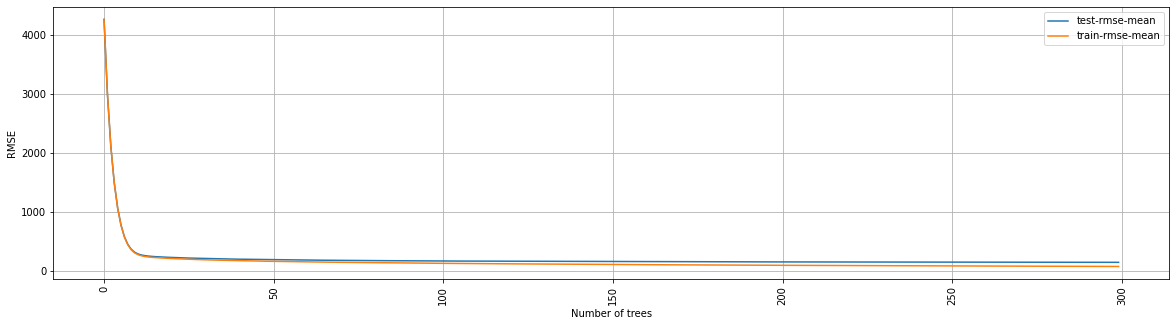

In [217]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

ax.plot(cvresult.index,cvresult["test-rmse-mean"],label="test-rmse-mean")
ax.plot(cvresult.index,cvresult["train-rmse-mean"],label="train-rmse-mean")

ax.legend()  
plt.ylabel('RMSE')
plt.xlabel('Number of trees')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

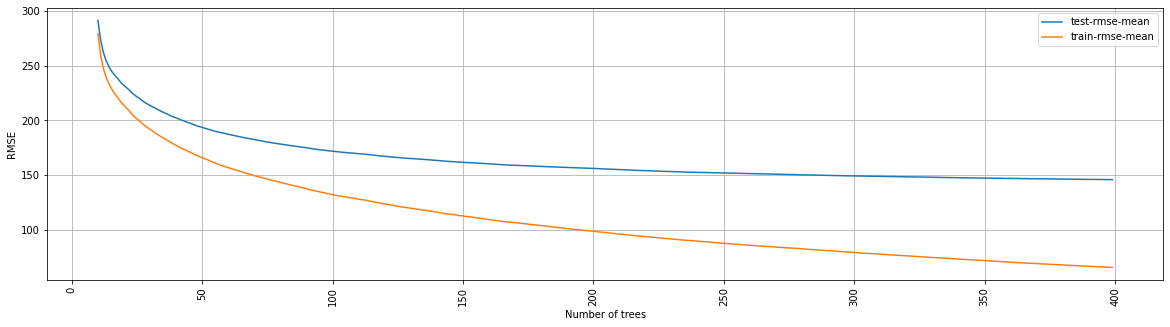

In [222]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

ax.plot(cvresult.index[10:],cvresult["test-rmse-mean"][10:],label="test-rmse-mean")
ax.plot(cvresult.index[10:],cvresult["train-rmse-mean"][10:],label="train-rmse-mean")

ax.legend()  
plt.ylabel('RMSE')
plt.xlabel('Number of trees')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Based on the graph, we can see that at the about first 10 trees, the rmse has significant decrease with the increase of trees. But after that, the influence of trees decrease. About the 200 trees, the slop is almost flat. Although the model still didnt arrive the optimum point, for save the computing power, we just use 200 trees.

In [225]:
cvresult[cvresult.index==200]

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
200,98.632011,1.101752,156.066406,3.667597


### 4.1 Parameter
### 4.1 eta
The defual of eat is 0.3, and range is [0,1] It is step size shrinkage. We can treate it as learning rate. The smaller eat can help use to arrive more accuracy of optimal, but we may need more number of trees. In the practice, we genearl set small eta and higher number of trees. 

Since computing power of computer, we just set the max number of tree is 200. And we use grid search to get minimum of rmse to try different values of eat. 

In [224]:
gridsearch_params = [i/1000 for i in range(10,450,50)]
params= {}
num_round = 200
n_fold=5
eta_rmse = []
for eta in gridsearch_params:
    print("CV with eta={}".format(eta))
    params["eta"] = eta

    cv_results = xgb.cv(params,dtrain,num_round,n_fold)
    eta_rmse.append(cv_results["test-rmse-mean"].min())

    print(cv_results[cv_results["test-rmse-mean"]==cv_results["test-rmse-mean"].min()])

CV with eta=0.01
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       865.112195         0.58654      868.297363       5.284829
CV with eta=0.06
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       166.766742        0.886222      191.178192       3.685561
CV with eta=0.11
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       138.438318        0.870868      170.687714       3.833432
CV with eta=0.16
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       122.604332        0.850631      161.269296       4.834274
CV with eta=0.21
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       112.201476        0.694519       157.16727       4.840617
CV with eta=0.26
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       104.242482        0.945679      155.481338       3.811709
CV with eta=0.31
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-s

When eta = 0.26, we can get the smallest rmse，which is 155.481338. Next step I narrow the range. We may can find the smaller rmse bewteen the 0.21 and 0.31

In [226]:
gridsearch_params = [i/1000 for i in range(210,310,10)]
params= {}
num_round = 200
n_fold=5
eta_rmse = []
for eta in gridsearch_params:
    print("CV with eta={}".format(eta))
    params["eta"] = eta

    cv_results = xgb.cv(params,dtrain,num_round,n_fold)
    eta_rmse.append(cv_results["test-rmse-mean"].min())

    print(cv_results[cv_results["test-rmse-mean"]==cv_results["test-rmse-mean"].min()])

CV with eta=0.21
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       112.201476        0.694521       157.16727       4.840617
CV with eta=0.22
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       110.932986        0.645873      156.931738       4.520938
CV with eta=0.23
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       109.135516        0.933664      156.970053       4.377702
CV with eta=0.24
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       107.221098        1.030117      156.690414       4.329411
CV with eta=0.25
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       105.388386        0.611049      155.211301       4.143833
CV with eta=0.26
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       104.242482        0.945677      155.481335       3.811705
CV with eta=0.27
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-s

In [ ]:
When eta = 0.26, we can get the smallest rmse，which is 155.211301 

### 4.2 max_depth and gamma
Then we need to consider the complexity of the each trees, which can help use to aviod overfitting. There are two parameters can be use control the complexity. 

First one is **gamma** is the minimum loss reduction required to make a further partition on a leaf node of the tree.The higher gamma the tree more simple. The default value is 0 and the range is [0, $\infty$]


Second one is **max_depth** is the maximum depth of a tree. The samller value will make the tree more simple. The default value is 6 and the range is [0, $\infty$]

Compare with gamma, the max_depth more easly to set value in grid search. For this reason, I just chose the **max_depth** to control the complexity of model. 

In [227]:
gridsearch_params = [i for i in range(1,11,1)]
params= {"eta":0.25}
num_round = 200
n_fold=5
max_depth_rmse= []
for max_depth in gridsearch_params:
    print("CV with max_depth={}".format(max_depth))
    params["max_depth"] = max_depth

    cv_results = xgb.cv(params,dtrain,num_round,n_fold)
    max_depth_rmse.append(cv_results["test-rmse-mean"].min())
    
    print(cv_results[cv_results["test-rmse-mean"]==cv_results["test-rmse-mean"].min()])

CV with max_depth=1
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       316.484137        1.534489      320.652502       4.219797
CV with max_depth=2
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       238.278485        1.003741      243.905347       3.172403
CV with max_depth=3
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       193.914349         1.50282       204.48284       2.279549
CV with max_depth=4
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       160.955127        1.717219      181.414746        3.04954
CV with max_depth=5
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       131.530496        0.964911       166.14653       4.671482
CV with max_depth=6
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       105.388385        0.611051      155.211298       4.143842
CV with max_depth=7
     train-rmse-mean  train-rmse-std  test-r

When max_depth is 9, we can get the lowest rmse, which is 149.501337

## 4.3 colsample_bytree and colsample_bylevel

Then we need to contro the subsampling of columns. There are two parameters： 

Colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructe. The default value is 1 and range of (0, 1]. 

Colsample_bylevel is colsample_bylevel is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree.  The default value is 1 and range of (0, 1]. 


In [230]:
gridsearch_params = [i/10 for i in range(1,11)]
params= {"eta":0.25,
        "max_depth":9}
num_round = 200
n_fold=5
colsample_bytree_rmse= []

for colsample_bytree in gridsearch_params:
    print("CV with colsample_bytree={}".format(colsample_bytree))
    params["colsample_bytree"] = colsample_bytree
    
    cv_results = xgb.cv(params,dtrain,num_round,n_fold)
    colsample_bytree_rmse.append(cv_results["test-rmse-mean"].min())

    print(cv_results[cv_results["test-rmse-mean"]==cv_results["test-rmse-mean"].min()])

CV with colsample_bytree=0.1
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       102.123524        3.050581      194.011581       4.365816
CV with colsample_bytree=0.2
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        61.076992        1.268155      166.136966       7.791195
CV with colsample_bytree=0.3
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199         51.59765        1.176707      154.029291       4.618281
CV with colsample_bytree=0.4
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        46.887969        0.593529      152.303784       3.002901
CV with colsample_bytree=0.5
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        45.549747         0.50775      150.331451       2.744175
CV with colsample_bytree=0.6
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        44.704611        0.247962       148.84306       4.127351
CV with co

When colsample_bytree=0.7, we can get lowest test-rmse-mean will be 146.90423

In [233]:
gridsearch_params = [i/10 for i in range(0,11)]
params= {"eta":0.25,
        "max_depth":9,
        "colsample_bytree":0.7}
num_round = 200
n_fold=5
colsample_bylevel_rmse=[]

for colsample_bylevel in gridsearch_params:
    print("CV with colsample_bylevel={}".format(colsample_bylevel))
    params["colsample_bylevel"] = colsample_bylevel

    cv_results = xgb.cv(params,dtrain,num_round,n_fold)
    colsample_bylevel_rmse.append(cv_results["test-rmse-mean"].min())

    print(cv_results[cv_results["test-rmse-mean"]==cv_results["test-rmse-mean"].min()])

CV with colsample_bylevel=0.0
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199       288.527362       12.022502      299.745831      14.146887
CV with colsample_bylevel=0.1
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        82.856656         1.57037      162.603876       3.657627
CV with colsample_bylevel=0.2
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        62.883984        0.975043       154.70896       2.836635
CV with colsample_bylevel=0.3
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        55.917681        0.900459      152.975113       4.741341
CV with colsample_bylevel=0.4
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        50.912075        1.094858      151.664081       3.622843
CV with colsample_bylevel=0.5
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199         49.31348        0.258792       150.78143       3.168101
CV w

The colsample_bylevel will keep the default value which is one.

## 4.4 lambda and alpha

Lambda and alpha are regularization term on weights. Lambda is L2 whose default value is 1. and alpha is L1 whose default value is 1. It is can help us to control the overfitting. When we increase the value, the model will become more conservative.

When lambda=9.0, we can get the lowest test-rmse-mean.

In [242]:
gridsearch_params =  [i/10 for i in range(0,11,2)]
params= {"eta":0.25,
        "max_depth":9,
        "colsample_bytree":0.7,
        "colsample_bylevel":1,
        "lambda":9
       }
num_round = 200
n_fold=5
alpha_rmse = []

for alp in gridsearch_params:
    print("CV with alpha={}".format(alp))
    params["alpha"] = alp

    cv_results = xgb.cv(params,dtrain,num_round,n_fold)
    alpha_rmse.append(cv_results["test-rmse-mean"].min())

    print(cv_results[cv_results["test-rmse-mean"]==cv_results["test-rmse-mean"].min()])

CV with alpha=0.0
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199         57.11134        1.038336      140.086511       3.197678
CV with alpha=0.2
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        57.484951        1.437087      141.067307       3.872979
CV with alpha=0.4
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        57.981136        1.183806      140.726407       2.830839
CV with alpha=0.6
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        57.758382        1.229983      141.226492       3.616884
CV with alpha=0.8
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        58.063394        0.731159      140.802612       3.311966
CV with alpha=1.0
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
199        58.109436        1.717313      141.550552       3.627189


When alpha=0, we can get the lowest test-rmse-mean.

## Predict

In [47]:

y = data2["load"]
X = data2.drop(columns=["load","date"])
dtest= xgb.DMatrix(X,y)

In [48]:
params= {"eta":0.25,
        "max_depth":9,
        "colsample_bytree":0.7,
        "colsample_bylevel":1,
        "lambda":9,
        "alpha":0}
num_round = 200

reg = xgb.train(params, dtrain, num_round)
pred = reg.predict(dtest)

In [49]:
from sklearn.metrics import mean_squared_error
import math

math.sqrt(mean_squared_error(pred,y))

179.76279246466166

In [50]:
load_forecast_NYISO = pd.read_csv("load_forecast_NYISO.csv")
load_forecast_NYISO = load_forecast_NYISO[load_forecast_NYISO["Zone Name"] == "N.Y.C."]
load_forecast_NYISO

,Eastern Date Hour,Zone Name,DAM Forecast Load,GMT Start Hour
8,2020/11/01 00:00:00,N.Y.C.,4396,4
19,2020/11/01 01:00:00,N.Y.C.,4192,5
30,2020/11/01 01:00:00,N.Y.C.,4192,6
41,2020/11/01 02:00:00,N.Y.C.,4067,7
52,2020/11/01 03:00:00,N.Y.C.,3991,8
...,...,...,...,...
7884,2020/11/30 19:00:00,N.Y.C.,5695,0
7895,2020/11/30 20:00:00,N.Y.C.,5466,1
7906,2020/11/30 21:00:00,N.Y.C.,5231,2
7917,2020/11/30 22:00:00,N.Y.C.,4919,3


In [51]:
load_forecast_NYISO

,Eastern Date Hour,Zone Name,DAM Forecast Load,GMT Start Hour
8,2020/11/01 00:00:00,N.Y.C.,4396,4
19,2020/11/01 01:00:00,N.Y.C.,4192,5
30,2020/11/01 01:00:00,N.Y.C.,4192,6
41,2020/11/01 02:00:00,N.Y.C.,4067,7
52,2020/11/01 03:00:00,N.Y.C.,3991,8
...,...,...,...,...
7884,2020/11/30 19:00:00,N.Y.C.,5695,0
7895,2020/11/30 20:00:00,N.Y.C.,5466,1
7906,2020/11/30 21:00:00,N.Y.C.,5231,2
7917,2020/11/30 22:00:00,N.Y.C.,4919,3


In [52]:
score= reg.get_score(importance_type="gain")

In [53]:
s = []
for i in X.columns:
    s.append(score[i])

<AxesSubplot:>

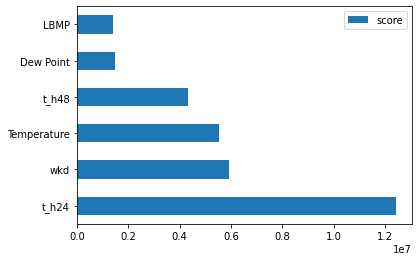

In [54]:
score = pd.DataFrame(data = s, index= X.columns,columns=["score"]).sort_values("score",ascending=False)[:6]
score.plot(kind='barh')

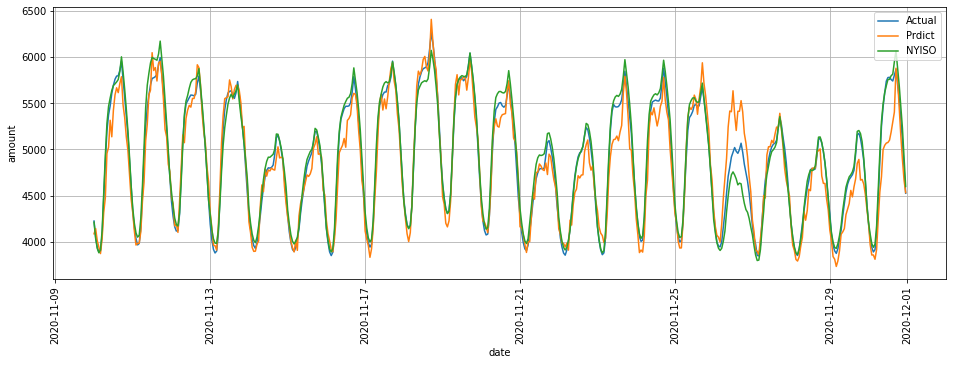

In [307]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(data2["date"]),y,label="Actual")
ax.plot(pd.to_datetime(data2["date"]),pred,label="Prdict")
ax.plot(pd.to_datetime(data2["date"]),
        load_forecast_NYISO[pd.to_datetime(load_forecast_NYISO["Eastern Date Hour"])>="2020-11-10"]["DAM Forecast Load"],
        label="NYISO")

ax.legend()  
plt.ylabel('amount')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

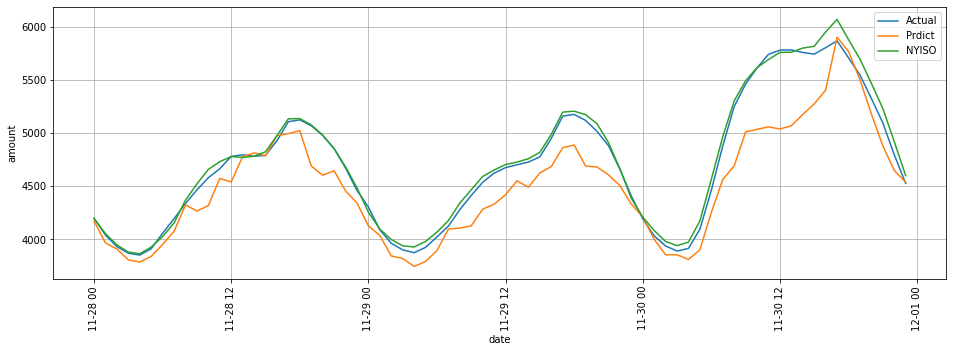

In [155]:
data2 = data[pd.to_datetime(data["date"])>="2020-11-28"]
y = data2["load"]
X = data2.drop(columns=["load","date"])
dtest= xgb.DMatrix(X,y)
params= {"eta":0.25,
        "max_depth":9,
        "colsample_bytree":0.7,
        "colsample_bylevel":1,
        "lambda":9,
        "alpha":0}
num_round = 200

reg = xgb.train(params, dtrain, num_round)
pred = reg.predict(dtest)

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(data2["date"]),y,label="Actual")
ax.plot(pd.to_datetime(data2["date"]),pred,label="Prdict")
ax.plot(pd.to_datetime(data2["date"]),
        load_forecast_NYISO[pd.to_datetime(load_forecast_NYISO["Eastern Date Hour"])>="2020-11-28"]["DAM Forecast Load"],
        label="NYISO")

ax.legend()  
plt.ylabel('amount')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()